In [456]:
from RidgeTrough.data_matching import CDFDay
from RidgeTrough.cdf_data import CDFData
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
%matplotlib inline
# %matplotlib notebook
%load_ext autoreload
import numpy as np
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [534]:
%autoreload

In [3]:
DATA_ROOT = r"/mnt/d/code/WeatherData/"
year = 2000
hgt_path = os.path.join(DATA_ROOT,"hgts",f'hgt.{year}.nc')
uwnd_path = os.path.join(DATA_ROOT,"u_winds",f'uwnd.{year}.nc')
vwnd_path = os.path.join(DATA_ROOT,"v_winds",f'vwnd.{year}.nc')
cdf = CDFData(hgt_path = hgt_path) # ,uwind_path= uwnd_path, vwind_path=vwnd_path)

INFO:root: 10:20:02 - Retrieved 2000 hgt data


(<Figure size 1500x400 with 2 Axes>,
 <GeoAxesSubplot: title={'center': 'Geopotential Heights'}>)

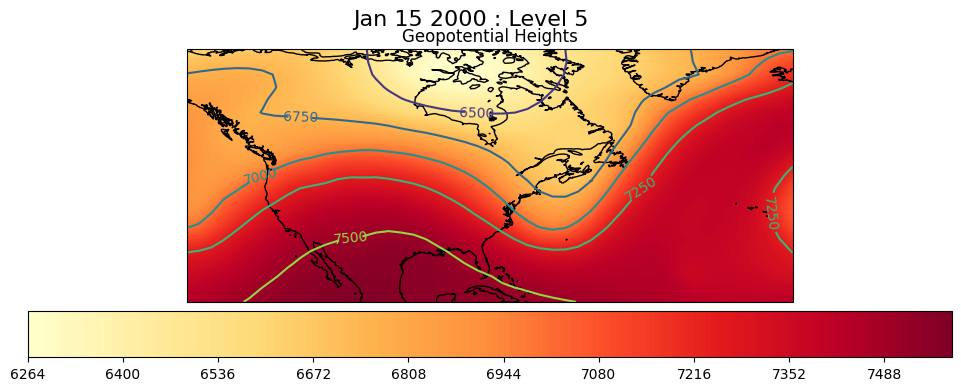

In [4]:
cdf.plot('hgts', 15, 5)

In [58]:
lat0=-10; lat1=70; lon0=-140; lon1=-20
lat_mask = ((cdf.lats >= lat0) & (cdf.lats <= lat1))
loc_lats = cdf.lats[lat_mask]

lon_mask = ((cdf.lons >= lon0) & (cdf.lons <= lon1))
loc_lons = cdf.lons[lon_mask]

start_lat = np.argwhere(lat_mask).min()
end_lat = np.argwhere(lat_mask).max()

start_lon = np.argwhere(lon_mask).min()
end_lon = np.argwhere(lon_mask).max()

print(cdf.hgts[...,start_lat+1:end_lat, start_lon+1:end_lon].shape)
print(cdf.hgts[...,10:20, 10:30].shape)

(366, 12, 31, 47)
(366, 12, 10, 20)


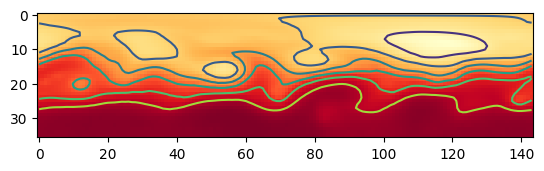

In [144]:
trunc_hgts = cdf.hgts[7,5,:(len(cdf.lats) //2),:]
plt.imshow(trunc_hgts,cmap='YlOrRd')
plt.contour(trunc_hgts)

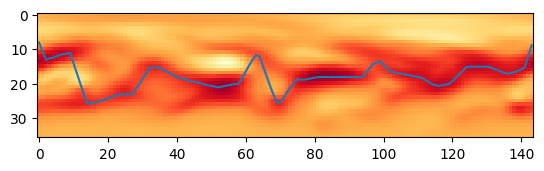

In [122]:
trunc_hgts = cdf.hgts[7,5,:(len(cdf.lats) //2),:]
hgts = ndimage.gaussian_filter(trunc_hgts, sigma=(1,1), order=0)
shift_mat = np.roll(hgts, 1, axis=0)
shift_mat[0,:] = hgts[0,:]
diff_mat = hgts - shift_mat
plt.imshow(diff_mat ,cmap='YlOrRd')

maxs = np.argmax(diff_mat, axis=0)
kernel_size = 5
kernel = np.ones(kernel_size) / kernel_size
data_convolved = np.convolve(maxs, kernel, mode='same')
plt.plot(data_convolved)

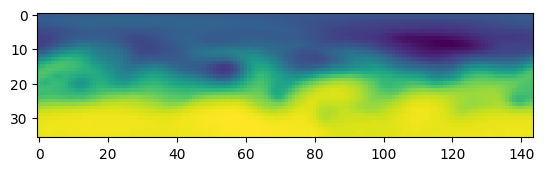

In [146]:
plt.imshow(trunc_hgts)

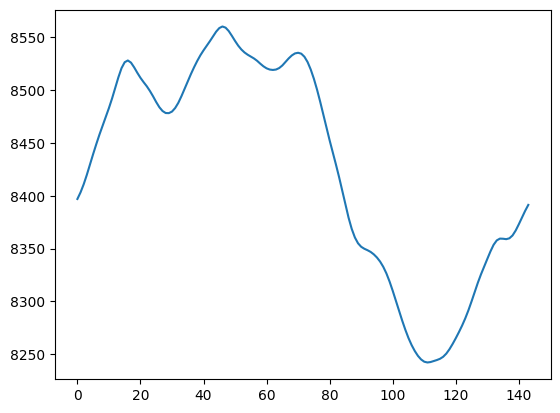

In [161]:
plt.plot(trunc_hgts[5,:])

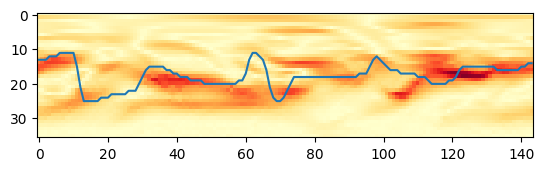

In [181]:
trunc_hgts = cdf.hgts[3,5,:(len(cdf.lats) //2),:]
hgts = trunc_hgts #ndimage.gaussian_filter(trunc_hgts, sigma=(1,1), order=0)
shift_mat = np.roll(hgts, 1, axis=0)
shift_mat[0,:] = hgts[0,:]
diff_mat = abs(hgts - shift_mat)
plt.imshow(diff_mat ,cmap='YlOrRd')
gauss_data = ndimage.gaussian_filter(maxs, 1, mode='wrap')
plt.plot(gauss_data)

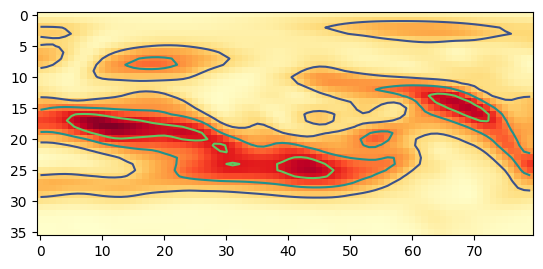

In [180]:
trunc_hgts = cdf.hgts[1,5,:(len(cdf.lats) //2),20:100]
hgts = trunc_hgts #ndimage.gaussian_filter(trunc_hgts, sigma=(1,1), order=0)
shift_mat = np.roll(hgts, 1, axis=0)
shift_mat[0,:] = hgts[0,:]
diff_mat = abs(hgts - shift_mat)
smooth_diff = ndimage.gaussian_filter(diff_mat, sigma=(1, 1), order=0)
plt.imshow(smooth_diff ,cmap='YlOrRd')
plt.contour(smooth_diff, levels=3)
# plt.plot(np.argmax(smooth_diff, axis=0))

In [185]:
import scipy.ndimage as ndimage

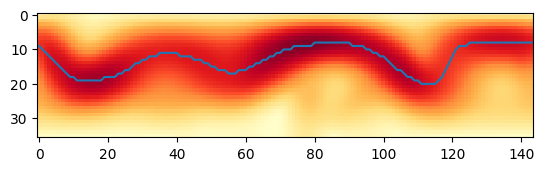

In [274]:
hgts = cdf.hgts[20,9,:(len(cdf.lats) //2),:]
grad = ndimage.gaussian_gradient_magnitude(hgts, sigma=(5,2))
plt.imshow(grad,cmap='YlOrRd')
plt.plot(np.argmax(grad, axis=0))

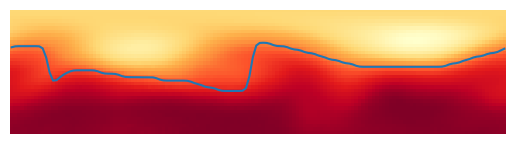

In [297]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

SIGMA = (5,2)
LEVEL = 9

fig, ax = plt.subplots()
ax.axis('off')
hgts = cdf.hgts[1,LEVEL,:(len(cdf.lats) //2),:]
grad = ndimage.gaussian_gradient_magnitude(hgts, sigma=SIGMA)
im = ax.imshow(hgts,cmap='YlOrRd')
ln, = ax.plot(np.argmax(grad, axis=0))

def init():
    hgts = cdf.hgts[1,LEVEL,:(len(cdf.lats) //2),:]
    grad = ndimage.gaussian_gradient_magnitude(hgts, sigma=SIGMA)
    maxs = np.argmax(grad, axis=0).astype(float)
    smooth_max = ndimage.gaussian_filter(maxs, 1, mode='wrap')
    ln.set_data(range(0,len(smooth_max)),smooth_max)
    im.set_data(hgts) # im.set_data(grad)
    return im,ln

def update(frame):
    hgts = cdf.hgts[frame,LEVEL,:(len(cdf.lats) //2),:]
    grad = ndimage.gaussian_gradient_magnitude(hgts, sigma=SIGMA)
    im.set_data(hgts)# im.set_data(grad)
    maxs = np.argmax(grad, axis=0).astype(float)
    smooth_max = ndimage.gaussian_filter(maxs, 1, mode='wrap')
    ln.set_data(range(0,len(smooth_max)),smooth_max)
    return im, ln

ani = FuncAnimation(fig, update, frames=range(2,100),
                    init_func=init, blit=True)

# ani = FuncAnimation(fig, update, frames=range(2,cdf.hgts.shape[0]-1),
#                     init_func=init, blit=True)
plt.show()

In [298]:
ani.save('lmao.gif')

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


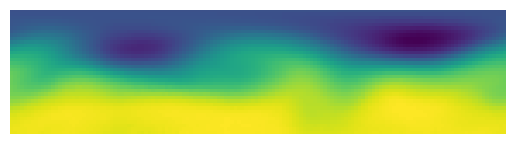

In [296]:
fig, ax = plt.subplots()
ax.axis('off')
ax.imshow(hgts)

What if we smooth in ALL directions???

In [334]:
all_hgts = cdf.hgts[...,:(len(cdf.lats) //2), :]
all_hgts.shape

(366, 12, 36, 144)

In [336]:
grad_tensor = np.zeros(all_hgts.shape)
for day in range(all_hgts.shape[0]):
    for level in range(all_hgts.shape[1]):
        grad_tensor[day, level] = ndimage.gaussian_gradient_magnitude(all_hgts[day, level,...], sigma=SIGMA)

In [328]:
# grad_tensor = ndimage.gaussian_gradient_magnitude(all_hgts, sigma=(0,0,*SIGMA))
# grad_tensor.shape

(366, 12, 36, 144)

In [343]:
maxs = np.argmax(grad_tensor, axis=2).astype(float)
maxs.shape # (day, level, longitude)

(366, 12, 144)

In [387]:
smooth_max = ndimage.gaussian_filter(maxs, (1.0,1.0,1), mode='wrap')
smooth_max.shape

(366, 12, 144)

In [496]:
%matplotlib notebook
# %matplotlib inline

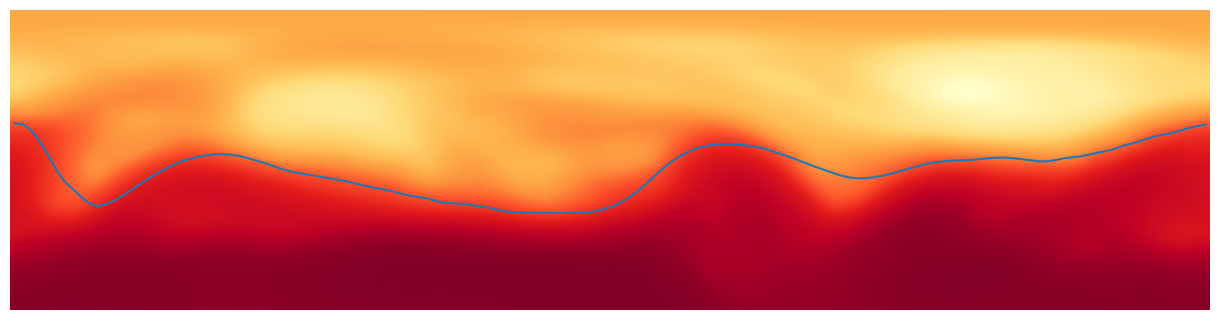

In [390]:
SIGMA = (5,2)
LEVEL = 5

AR = all_hgts.shape[-1] / all_hgts.shape[-2]
FIG_WIDTH = 12
FIG_HEIGHT = FIG_WIDTH / AR

fig, ax = plt.subplots(figsize=(FIG_WIDTH,FIG_HEIGHT))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
ax.axis('off')
im = ax.imshow(all_hgts[1, LEVEL, ...], cmap='YlOrRd', interpolation='bilinear')
ln, = ax.plot(smooth_max[1, LEVEL, :])

def init():
    hgts = all_hgts[1, LEVEL, ...]
    smooth_max_i = smooth_max[1, LEVEL, :]
    ln.set_data(range(0,len(smooth_max_i)),smooth_max_i)
    im.set_data(hgts)
    return im,ln

def update(frame):
    hgts = all_hgts[frame, LEVEL, ...]
    smooth_max_i = smooth_max[frame, LEVEL, :]
    ln.set_data(range(0,len(smooth_max_i)),smooth_max_i)
    im.set_data(hgts)
    return im, ln

ani = FuncAnimation(fig, update, frames=range(2,100), init_func=init, blit=True)

plt.show()

In [380]:
ani.save('smoothed_max_grads.gif')

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


In [398]:
from RidgeTrough.lines import grads, max_grads, ridge_gif

In [399]:
g = grads(all_hgts)

In [400]:
m = max_grads(g)

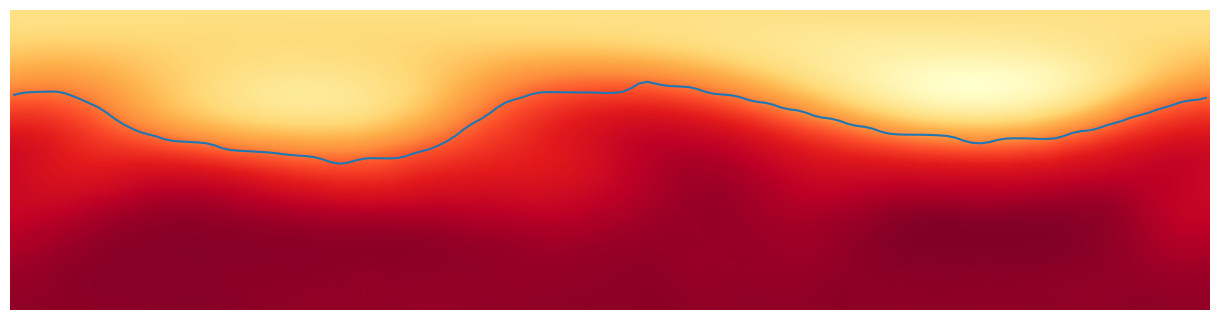

In [403]:
ridge_gif(all_hgts, m, level=10)

In [407]:
import re

In [419]:
hgt_re = r'^hgt.\d\d\d\d.nc$'
files = os.listdir(HGT_PATH)
m = re.search(hgt_re, files[7])
m is None
# m.group(0)

False

In [426]:
hgt_path = os.path.join(DATA_ROOT,"hgts")
files = os.listdir(HGT_PATH)
min_year = float('inf')
max_year =  float('-inf')
for file in files:
    m = re.search(hgt_re, file)
    if m is not None:
        year = int(m.group(0).split('.')[1])
        if year < min_year:
            min_year = year
        if year > max_year:
            max_year = year

In [447]:
data = get_data(hgt_path, yr_range=(1985, 1987))

1985
1986
1987


In [450]:
cat_data = np.concatenate(data)

In [459]:
from RidgeTrough.cdf_data import FullCDFData

In [475]:
d = FullCDFData(hgt_path, yr_range=(1985, 1987))

1985
1986
1987


In [479]:
hgts = d.hgts[...,:(len(d.lats) //2), :]

In [482]:
import RidgeTrough.lines

In [946]:
d = RidgeTrough.lines.FullCDFData(hgt_path, yr_range=(1985, 1990), smooth_sigma=(1.,3.,2.))

getting gradients: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 2191/2191 [00:21<00:00, 103.32it/s]


In [952]:
# %matplotlib notebook
%matplotlib inline

In [645]:
d.update_max_lines((0.5,1.0,1.))

<IPython.core.display.Javascript object>


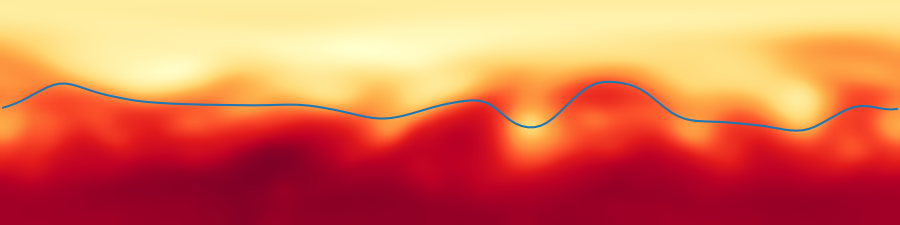

In [949]:
anim = ridge_gif(d.hgts[0:200], d.grad_lines[0:200], level=6, fig_width=9)

In [546]:
anim.save('newlvl8.gif')

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


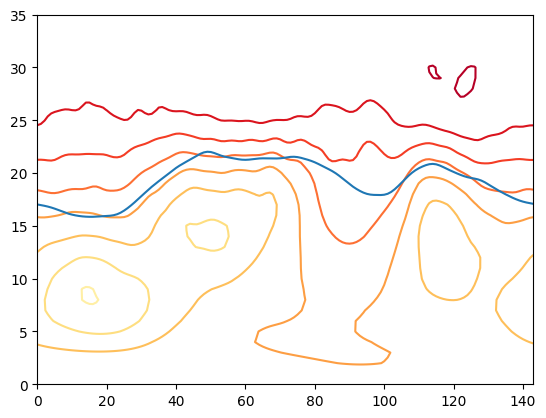

In [953]:
plt.contour(d.hgts[25,9,:], cmap='YlOrRd')
plt.plot(d.grad_lines[25,9,:])

In [951]:
plt.plot(d.grad_lines[10,5,:])

In [553]:
import scipy.signal as signal

In [707]:
lp = d.grad_lines[:,4:6,:].sum(axis=1)
lp = lp / lp.max(axis=0)
# plt.plot(lp, c='blue', alpha=0.1)
# plt.show()

In [999]:
DISTANCE = 5
PROMINANCE = 2

trough_xs = []
trough_ys = []
peak_xs = []
peak_ys = []
trough_locs = []
peak_locs = []
for i in range(lp.shape[0]):
    l = d.grad_lines[i,5,:] # lp[i]
    _troughs = signal.find_peaks(-l, distance=DISTANCE, prominence=PROMINANCE)[0]
    _peaks = signal.find_peaks(l, distance=DISTANCE, prominence=PROMINANCE)[0]
    trough_locs.append(_troughs)
    peak_locs.append(_peaks)
    for trough in _troughs:
        trough_xs.append(i)
        trough_ys.append(trough)
    for peak in _peaks:
        peak_xs.append(i)
        peak_ys.append(peak)

Text(0.5, 0, 'trough location (latitude)')

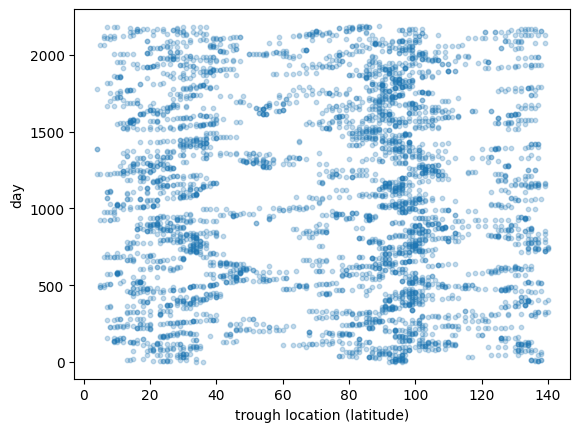

In [1000]:
plt.scatter(trough_ys, trough_xs, s=10, alpha=0.25)
plt.ylabel('day')
plt.xlabel('trough location (latitude)')

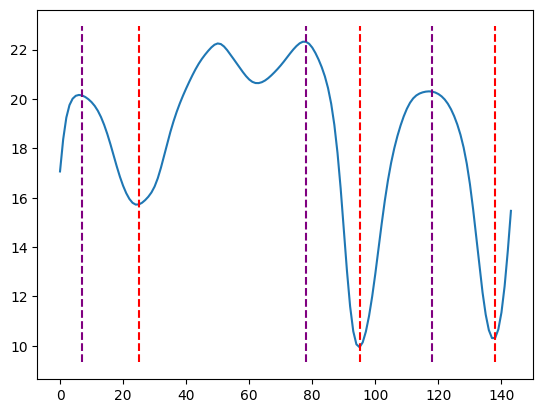

In [1025]:
day = 10
level = 6
fig, ax = plt.subplots()
ax.plot(d.grad_lines[day,level,:])
yl = ax.get_ylim()
ax.vlines(trough_locs[day], *yl, color='red', linestyle='dashed')
ax.vlines(peak_locs[day], *yl, color='purple', linestyle='dashed')

/tmp/ipykernel_17795/3682552643.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


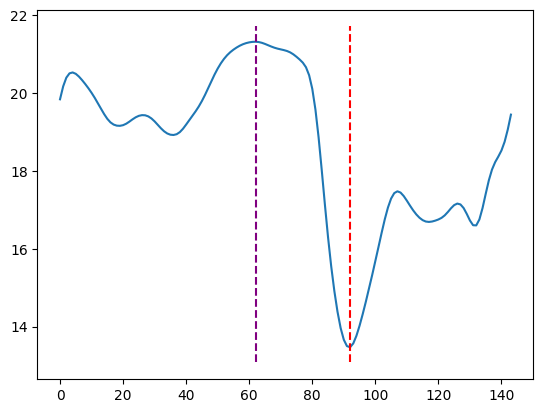

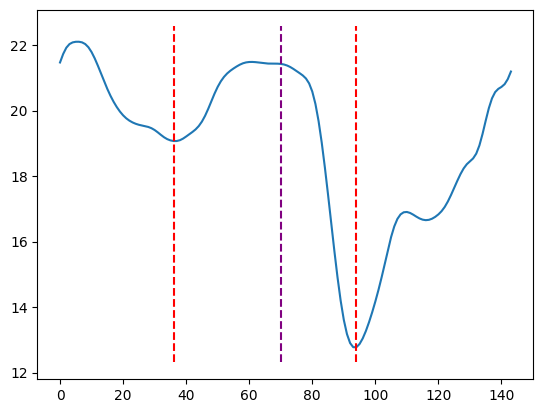

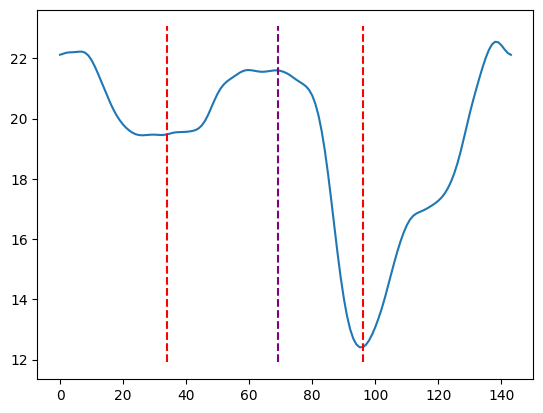

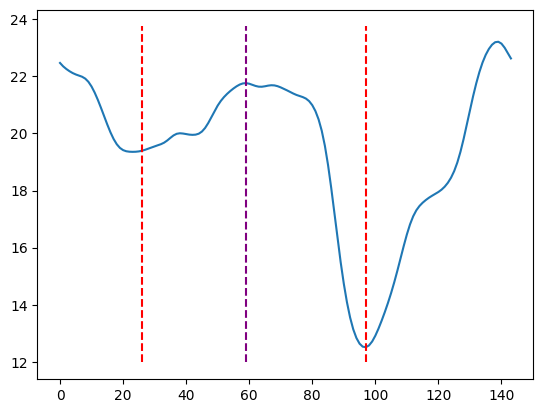

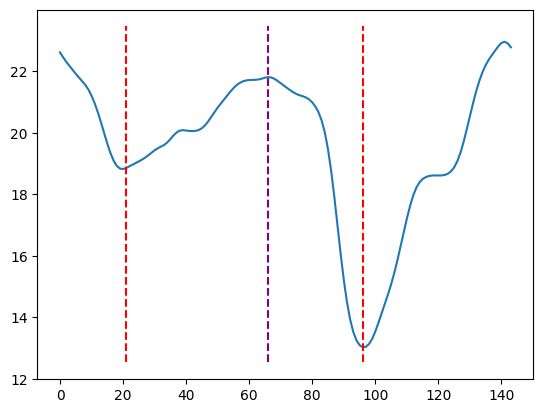

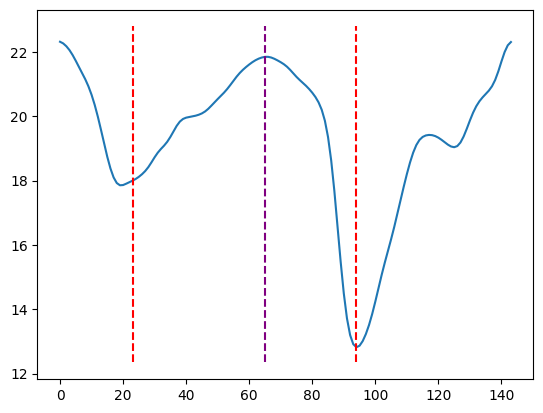

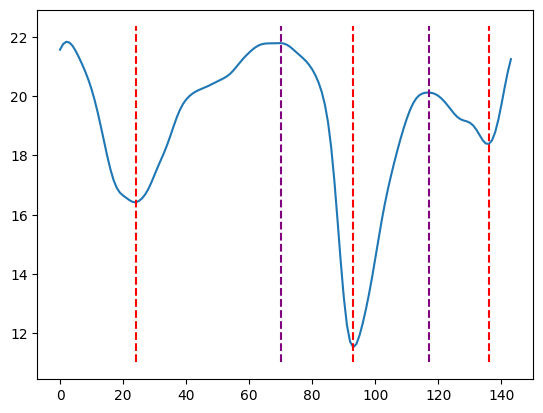

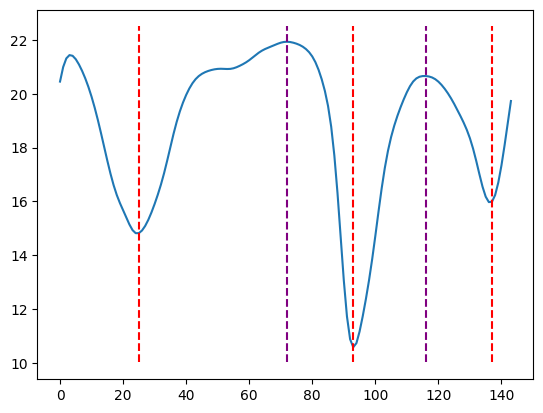

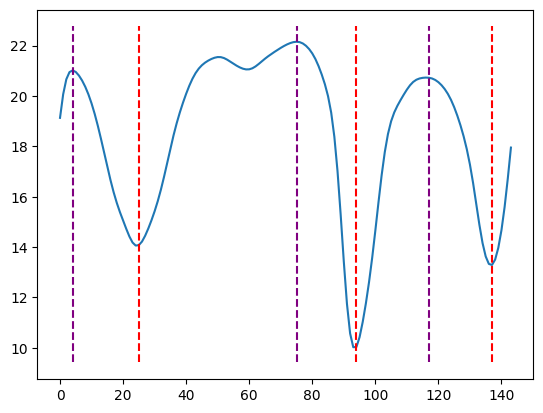

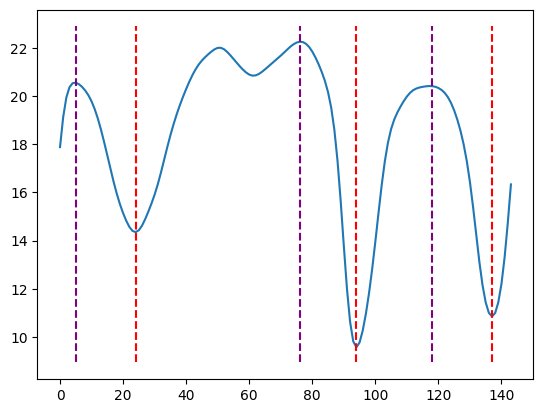

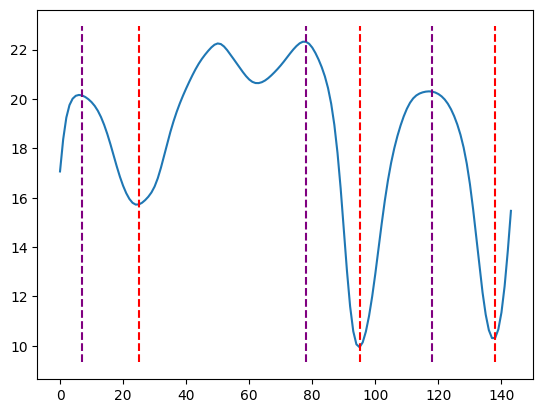

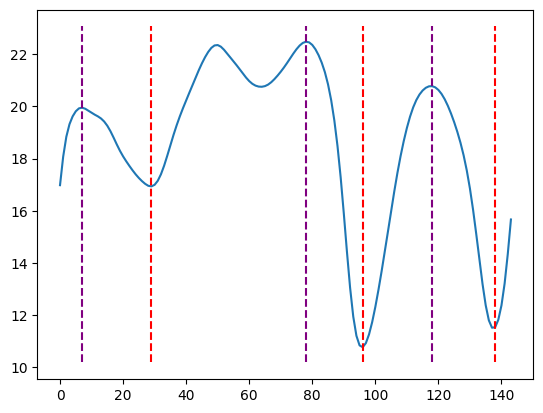

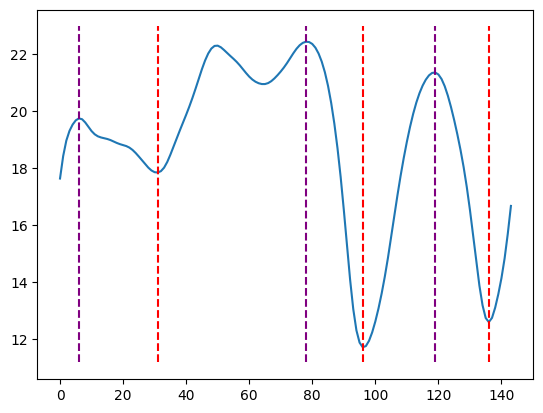

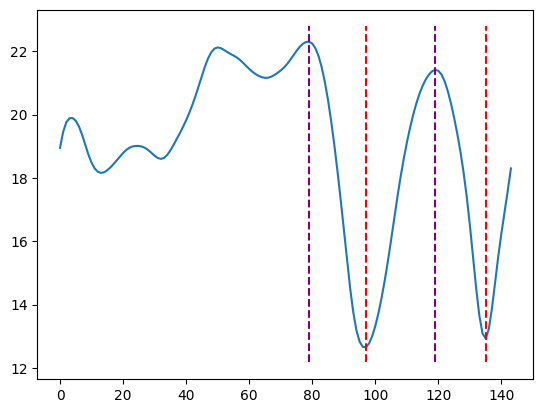

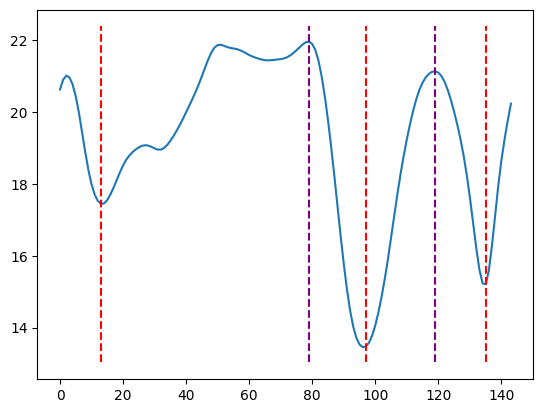

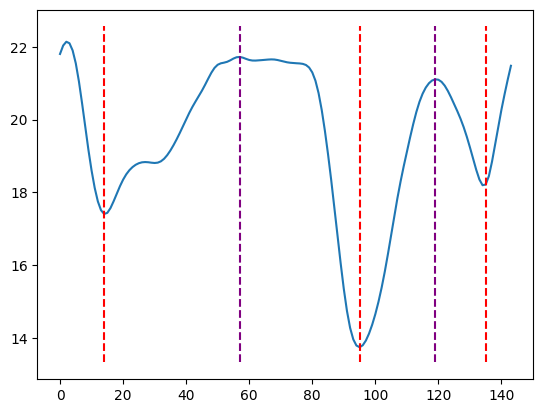

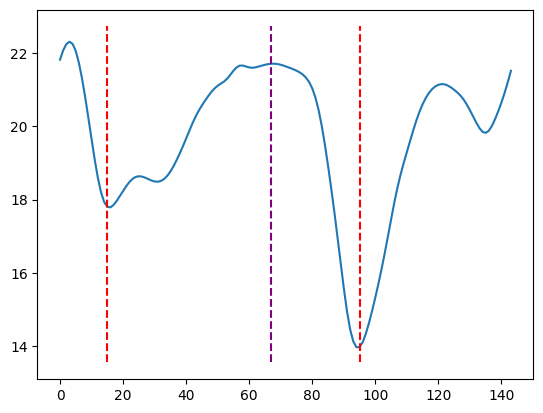

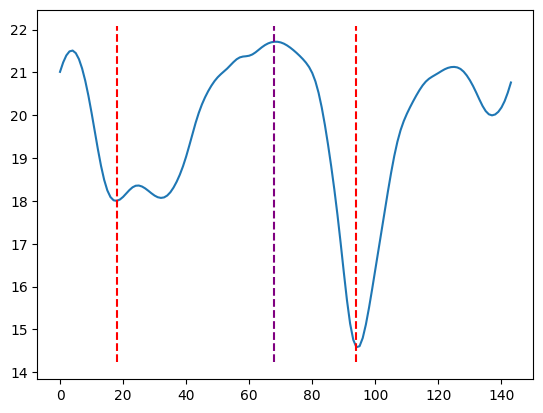

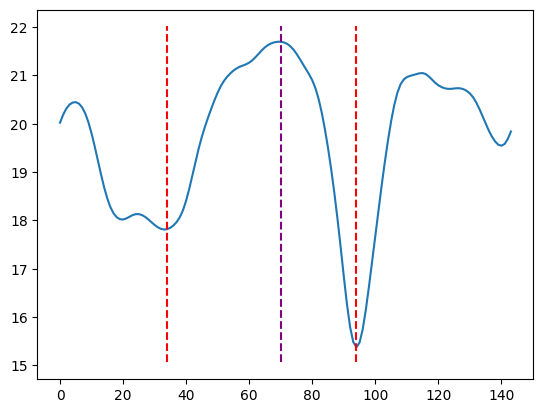

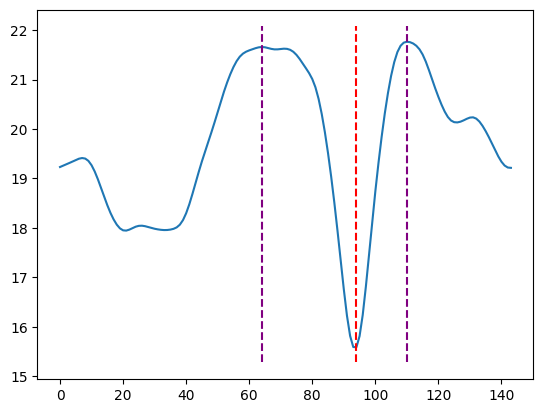

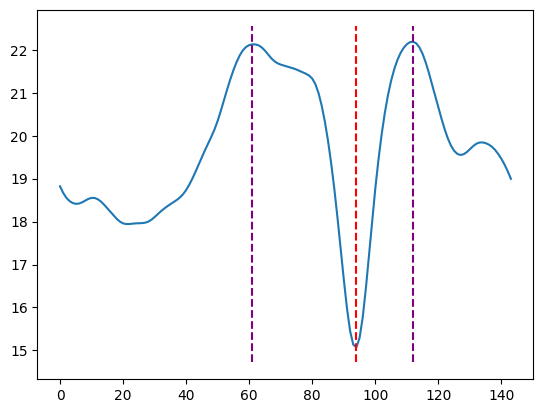

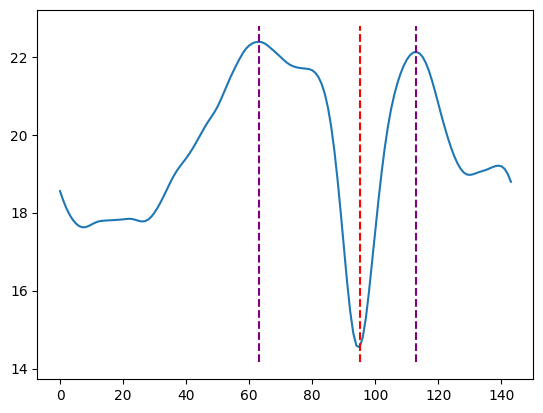

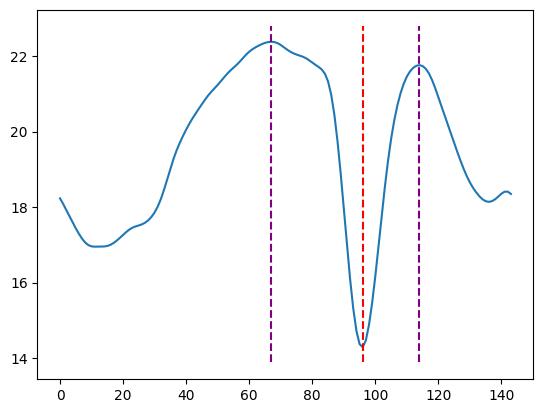

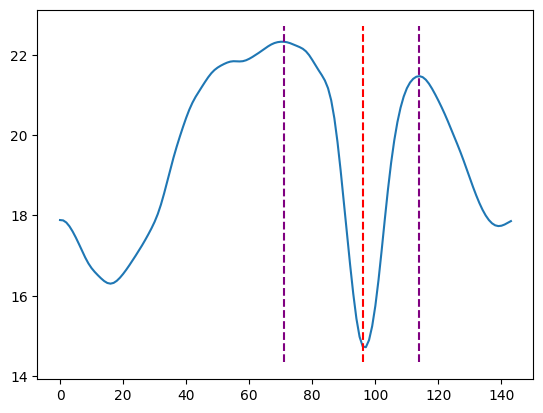

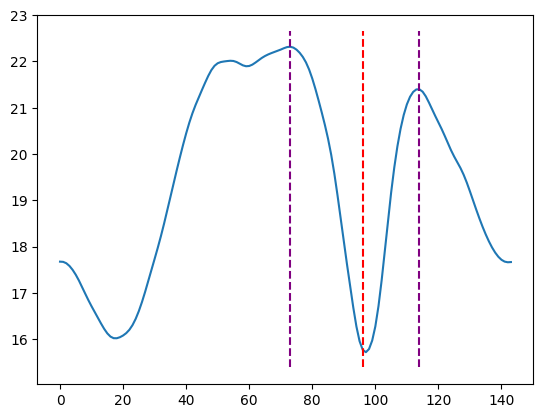

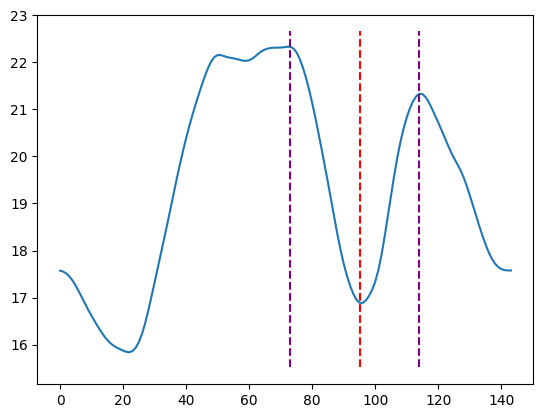

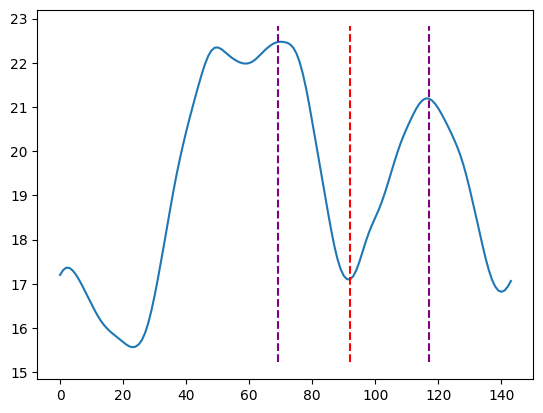

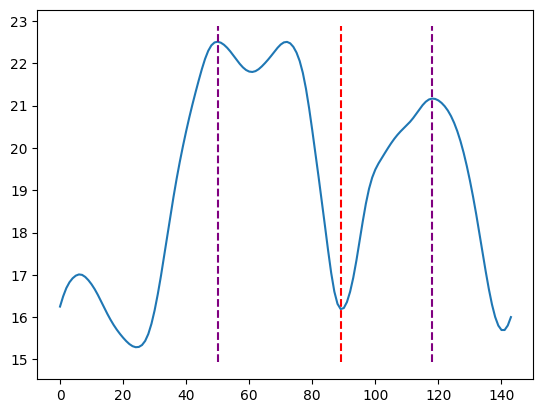

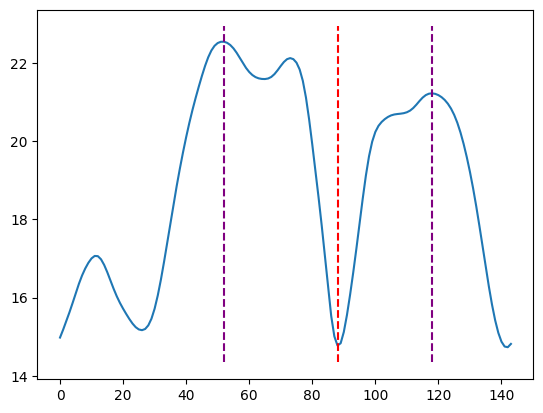

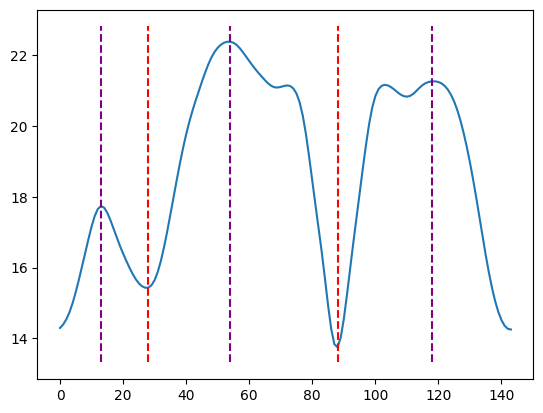

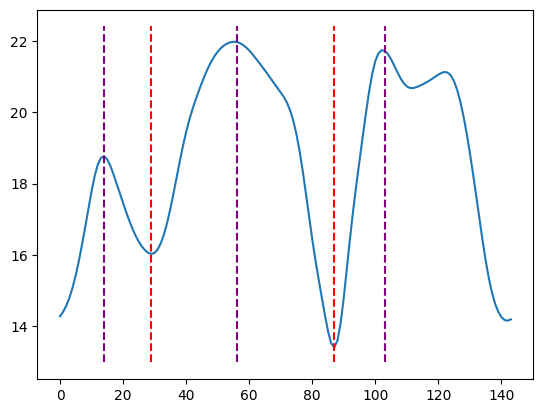

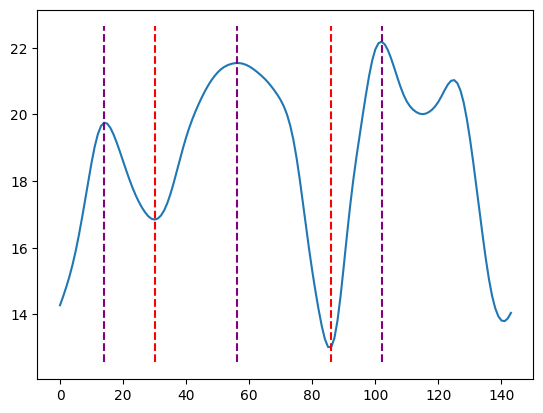

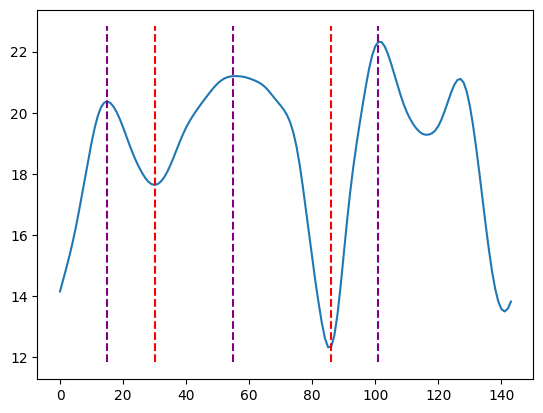

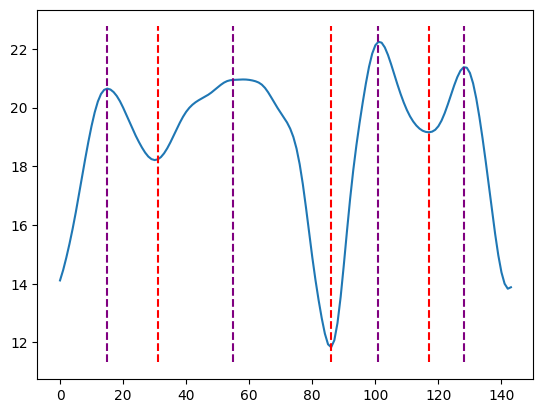

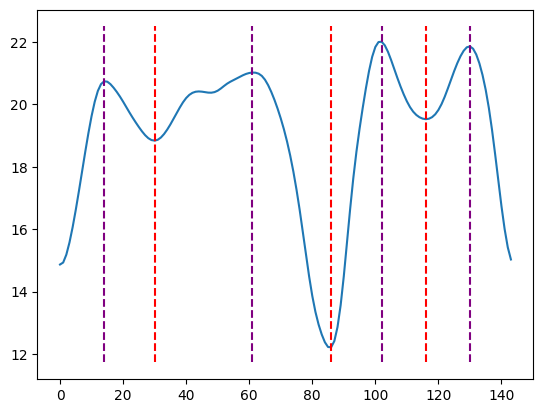

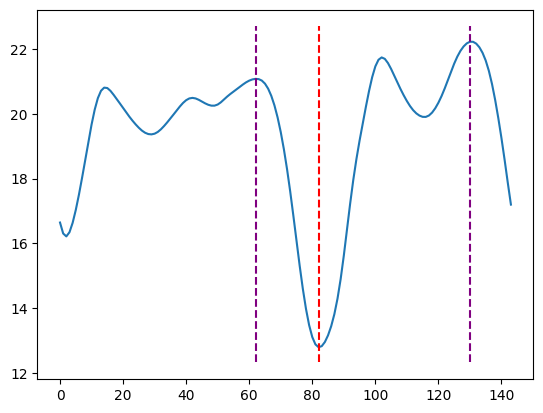

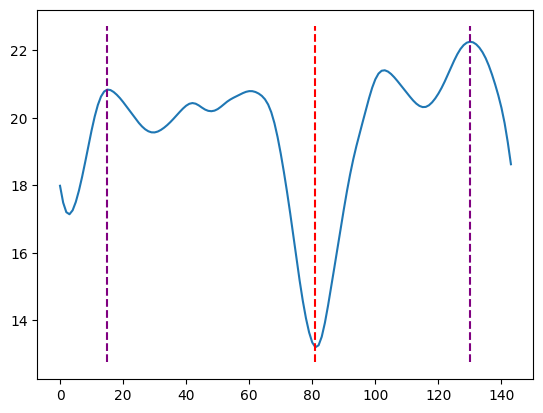

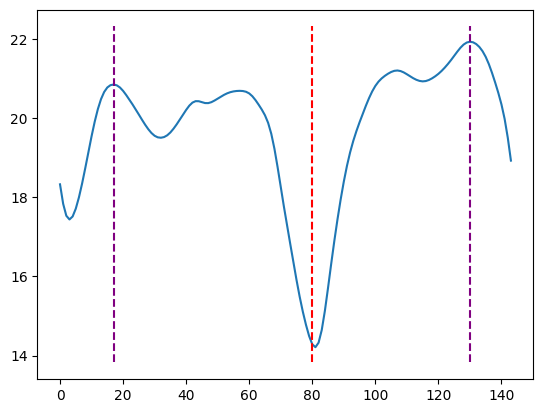

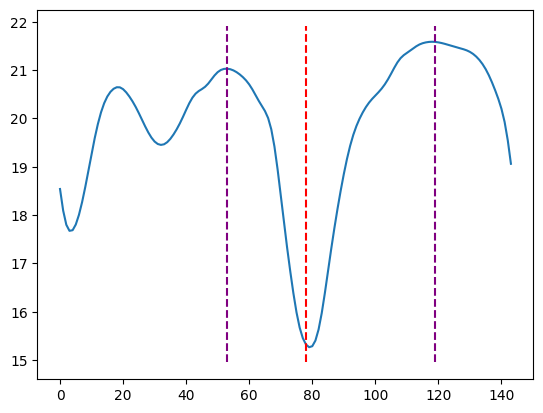

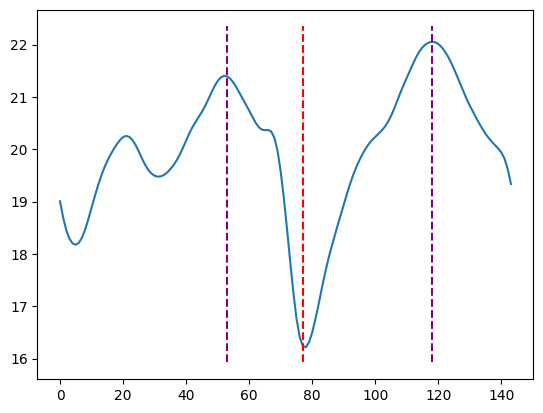

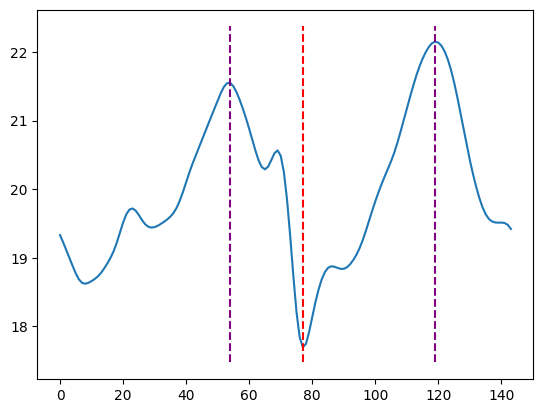

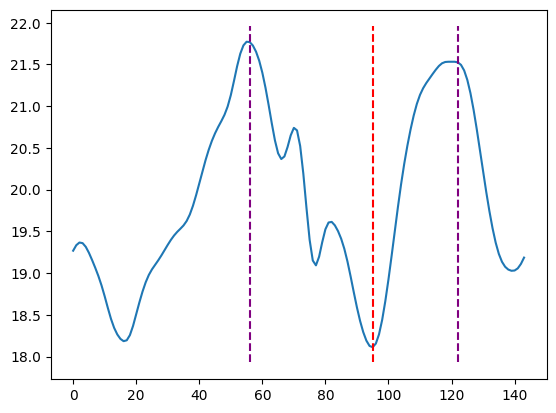

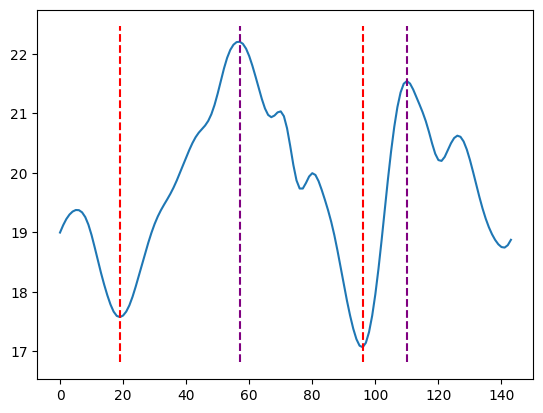

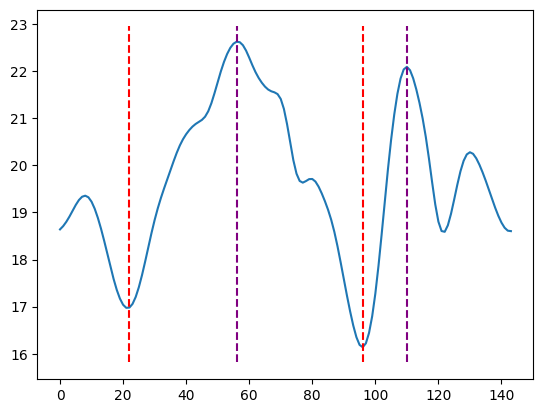

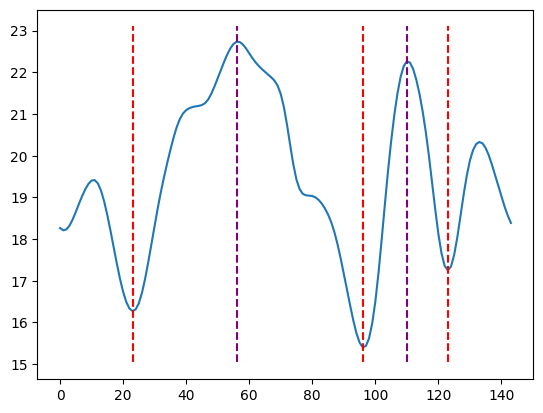

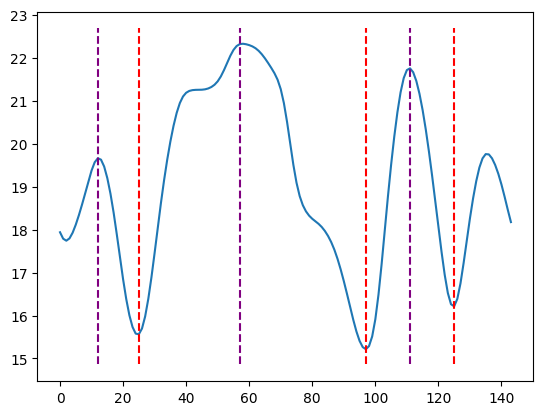

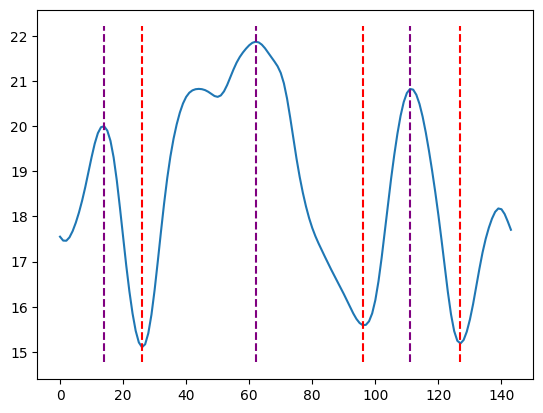

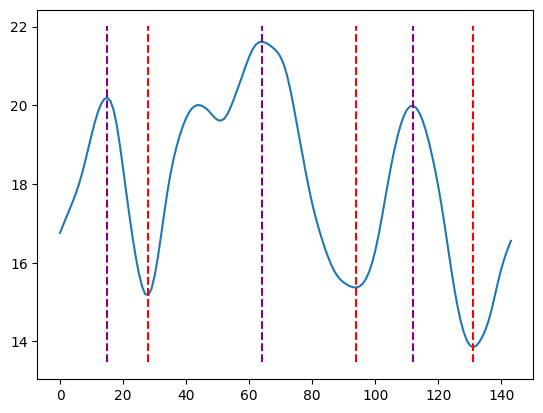

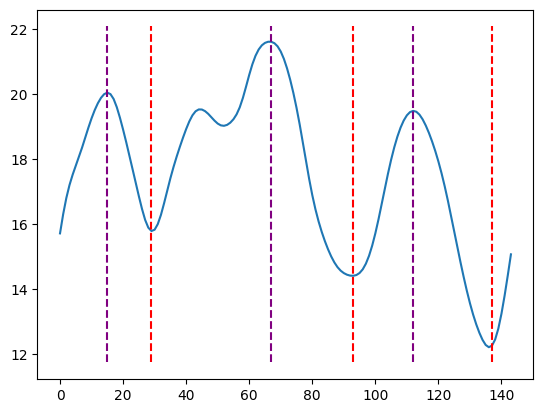

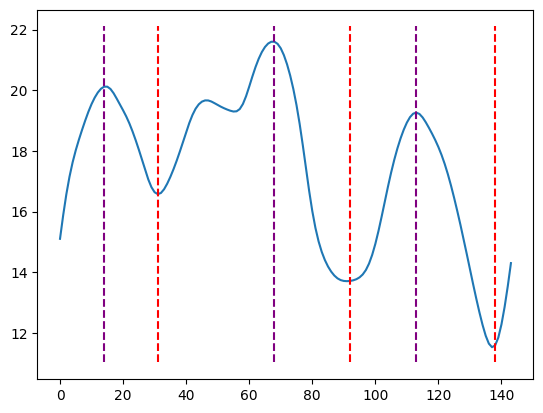

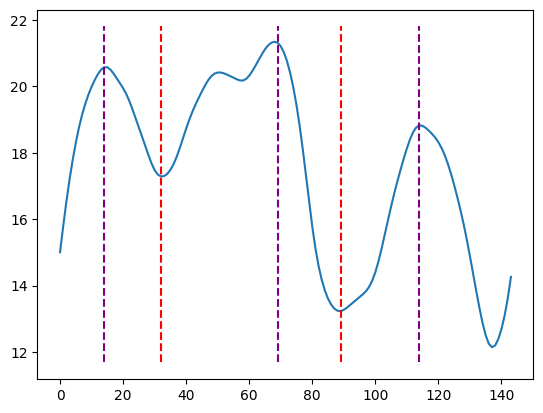

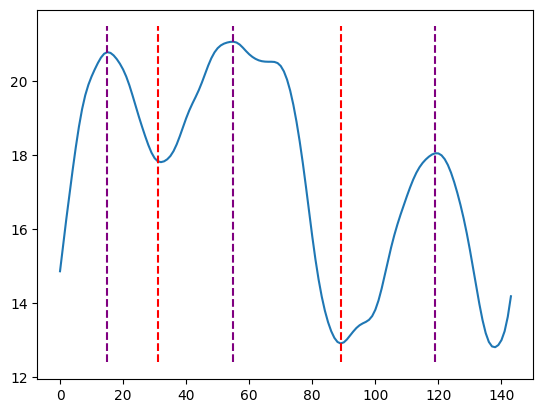

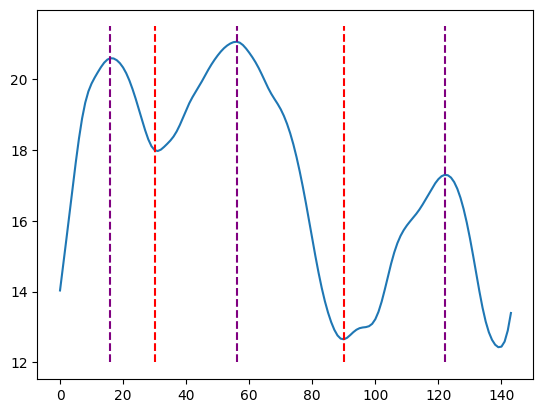

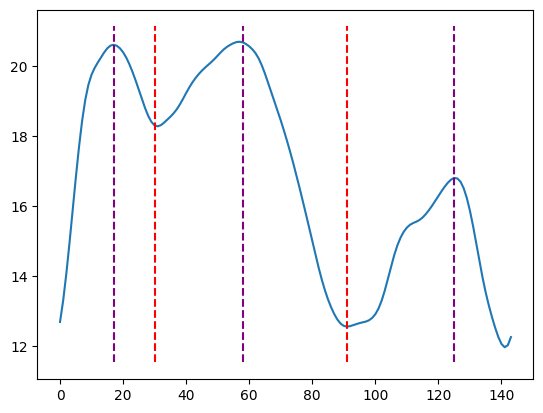

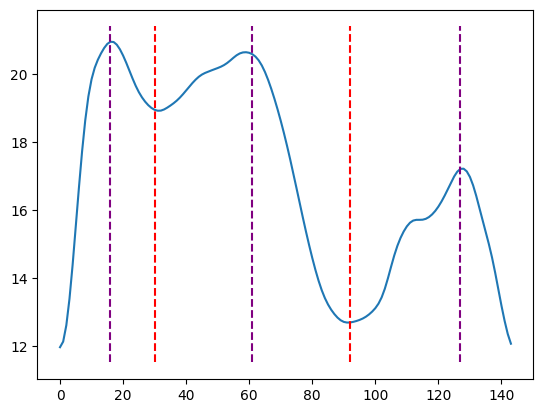

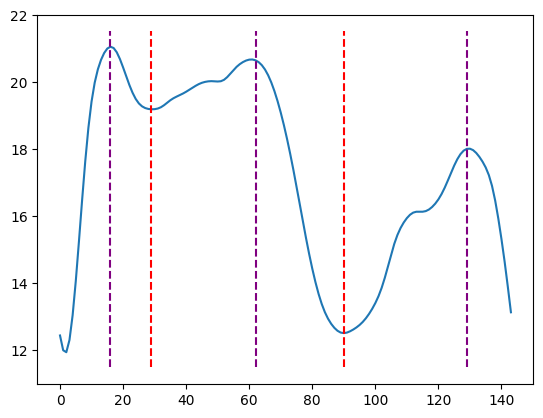

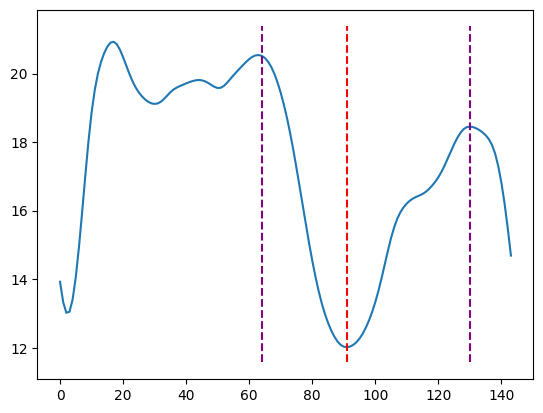

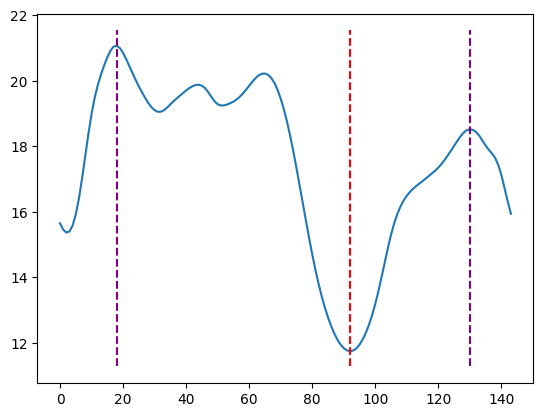

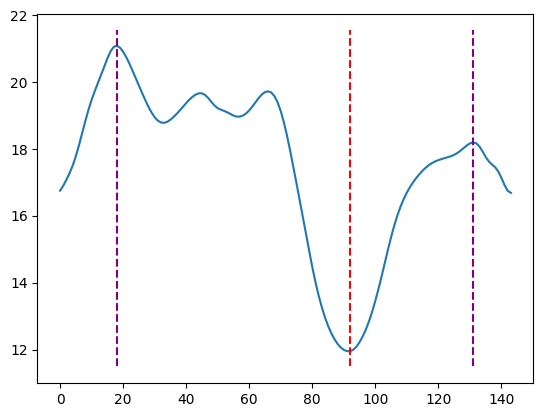

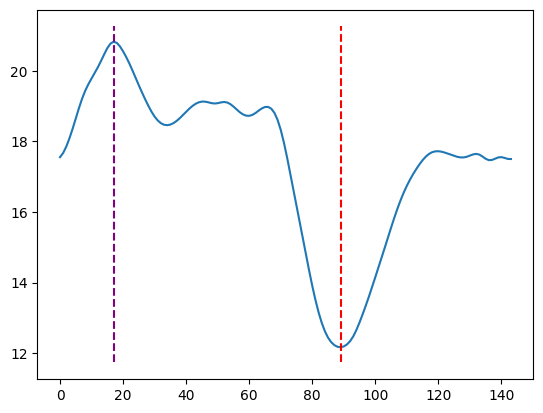

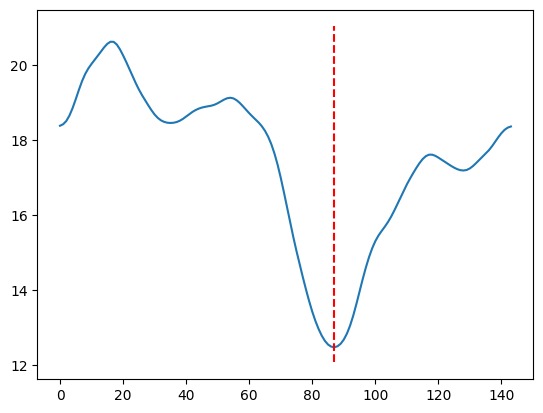

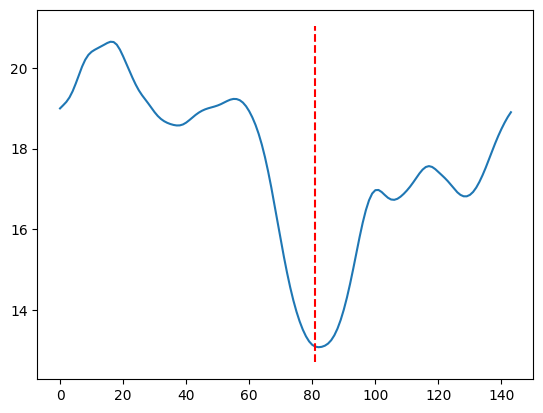

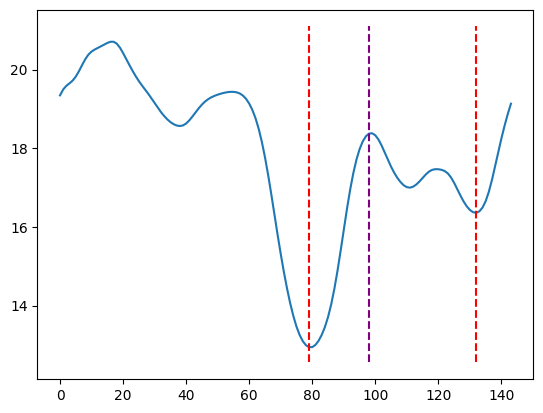

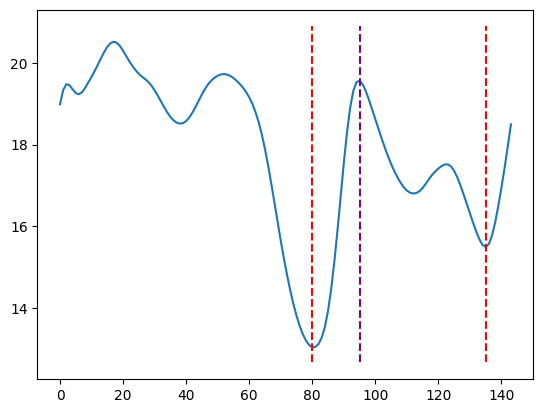

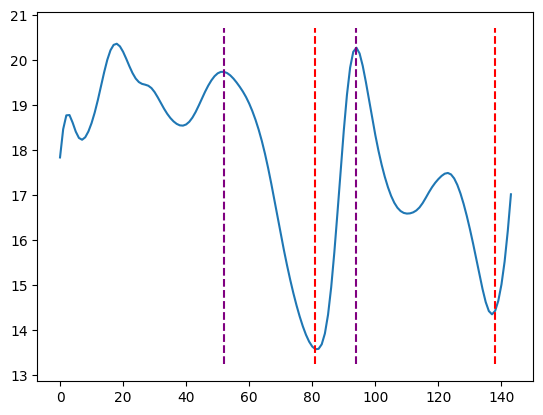

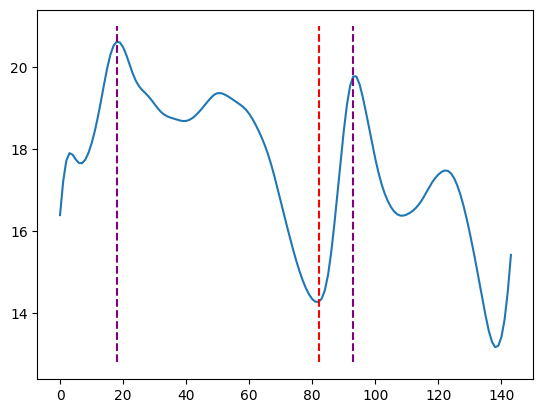

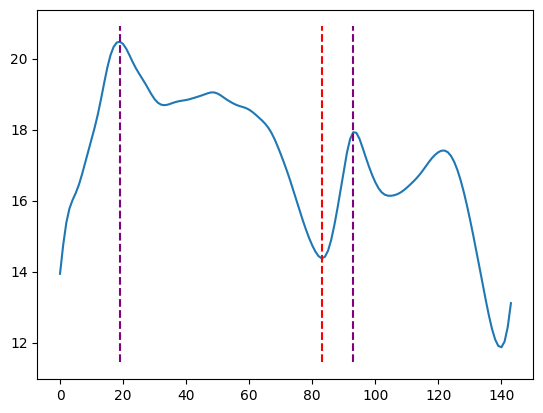

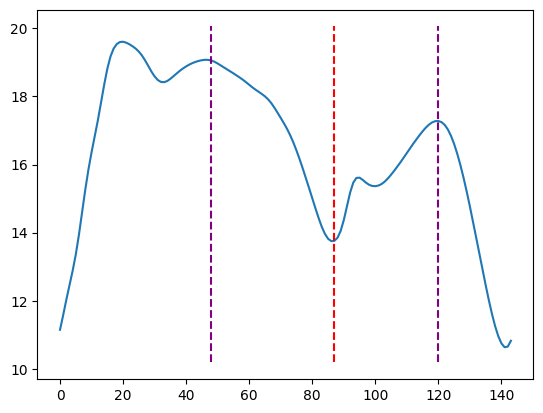

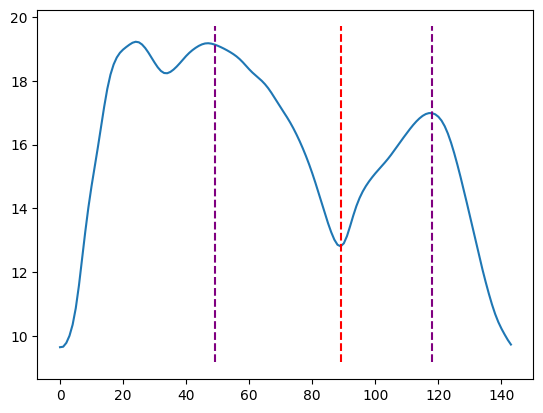

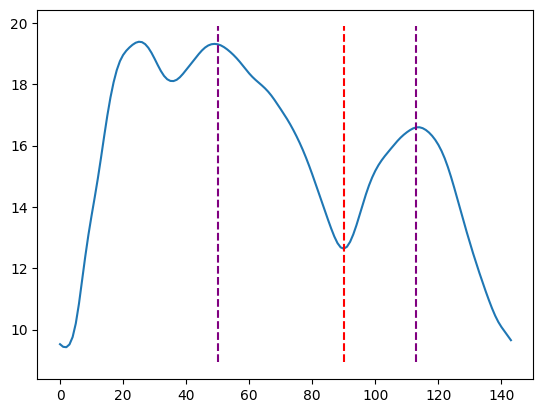

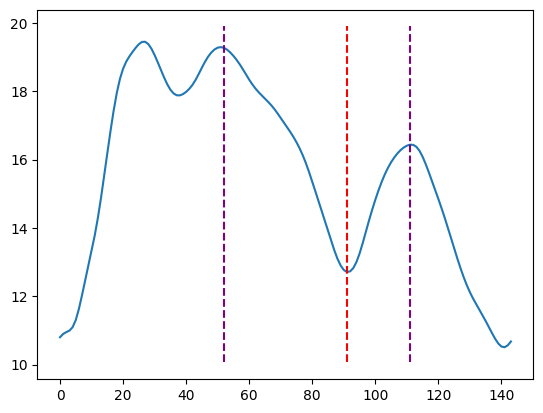

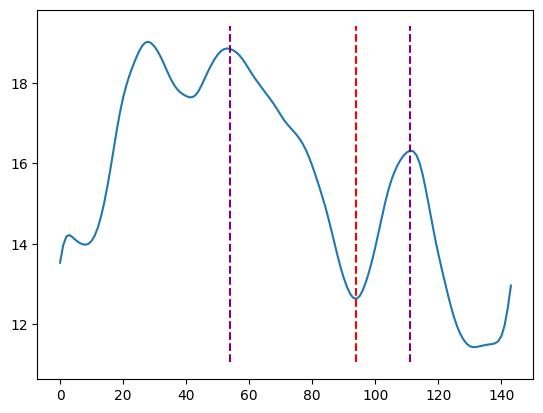

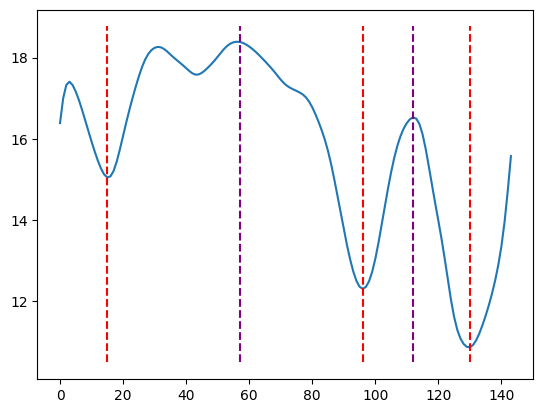

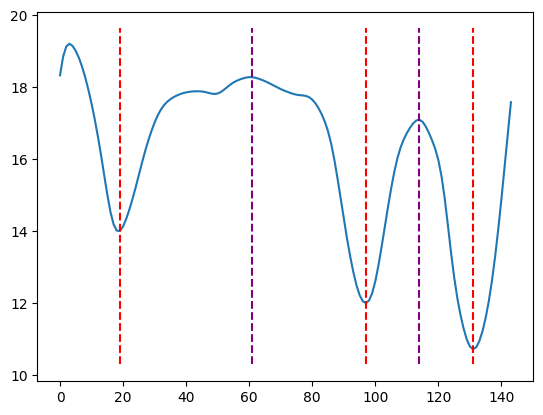

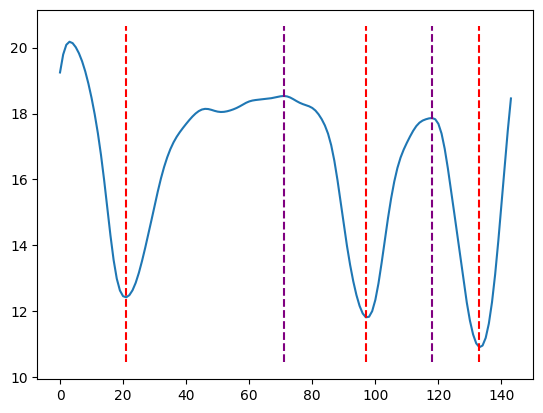

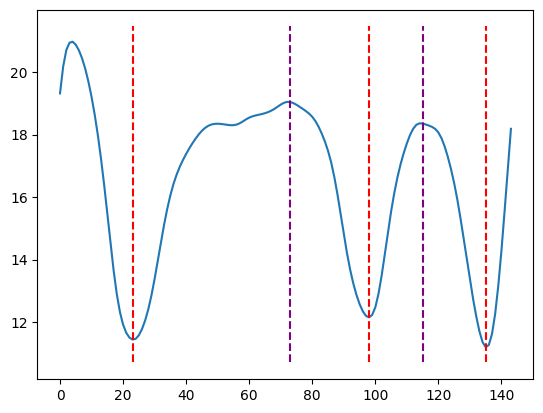

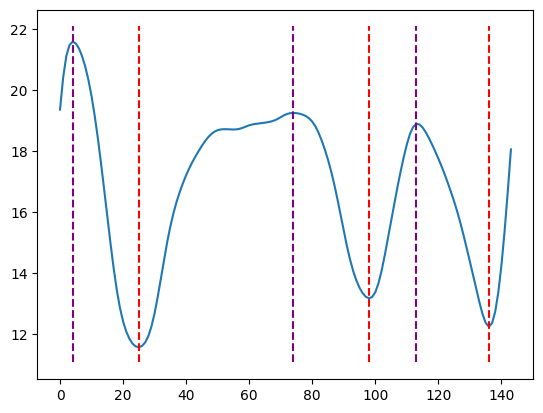

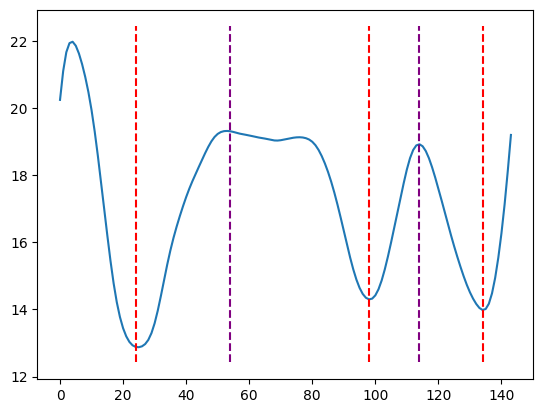

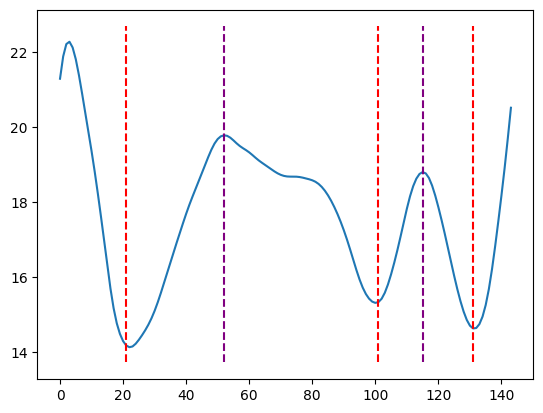

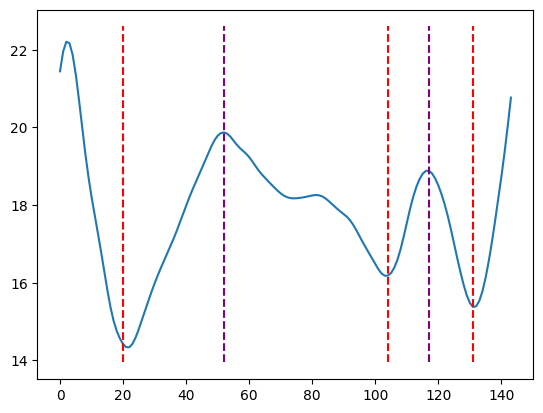

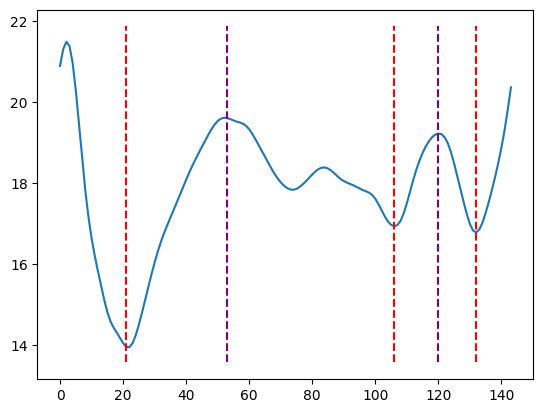

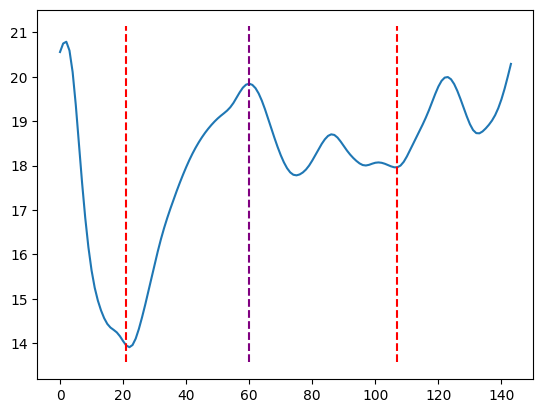

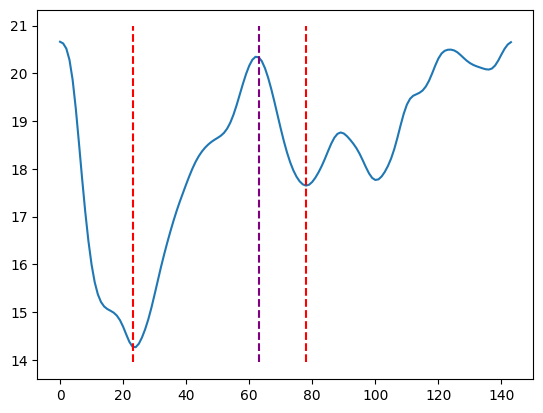

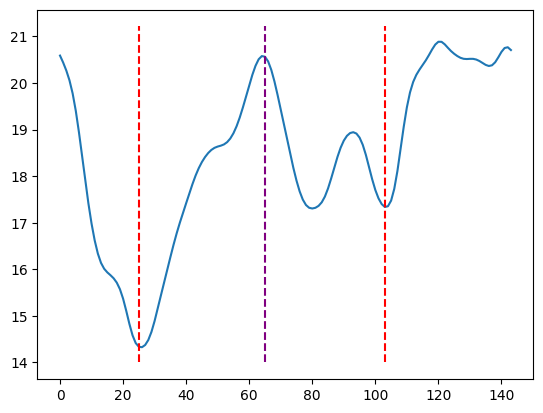

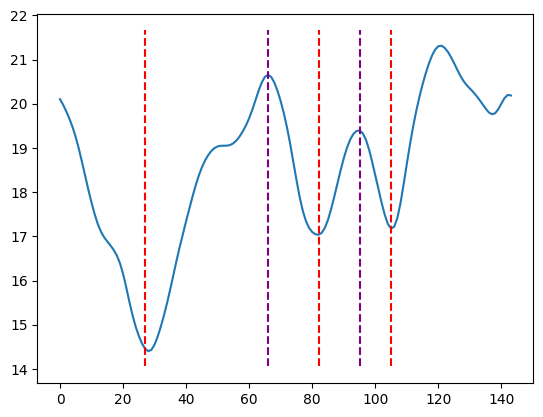

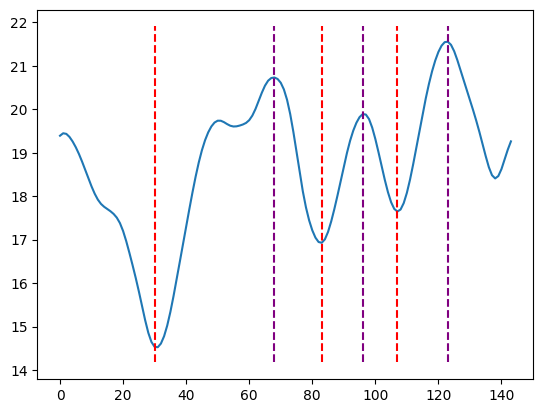

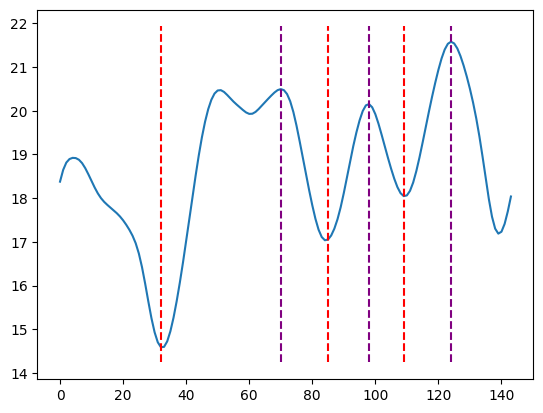

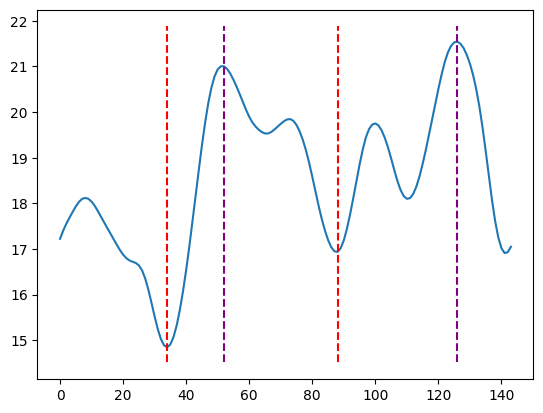

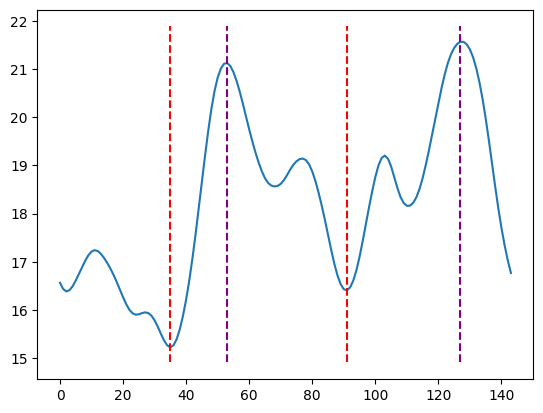

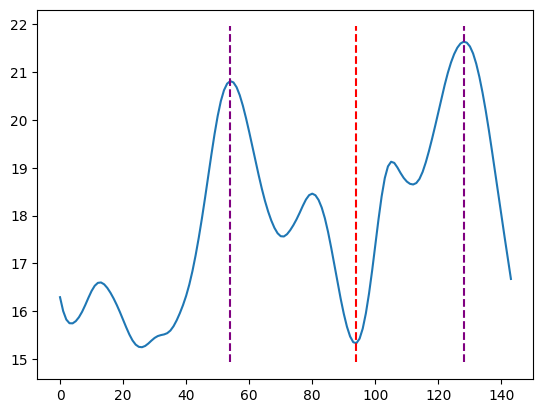

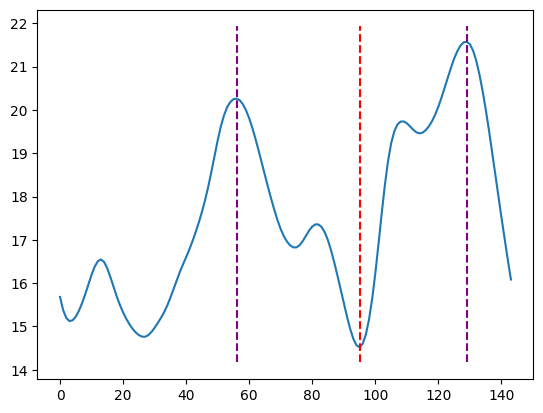

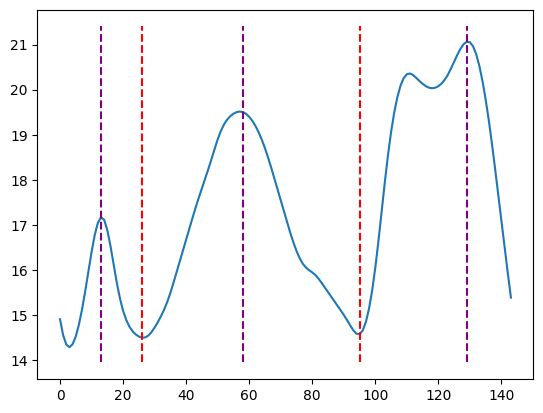

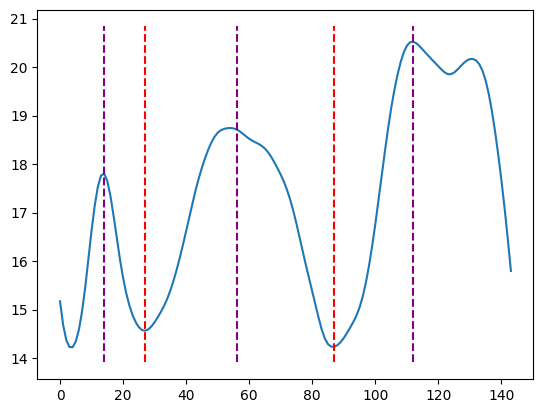

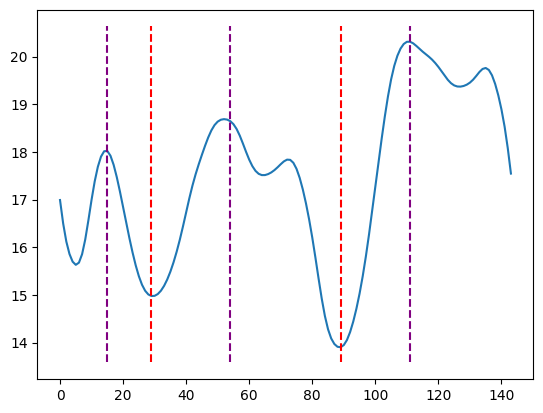

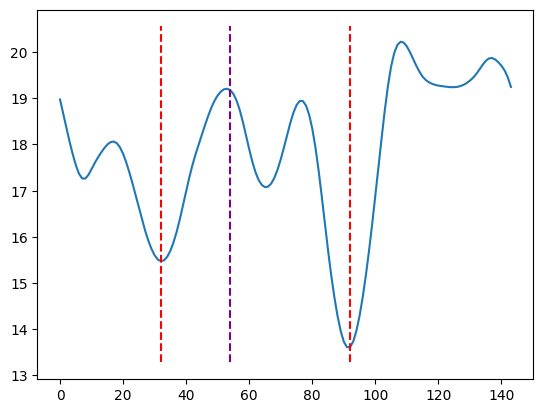

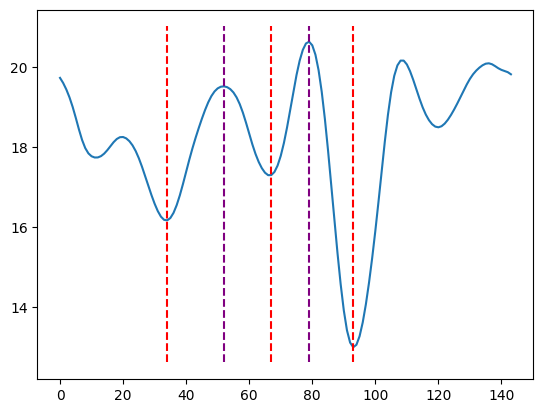

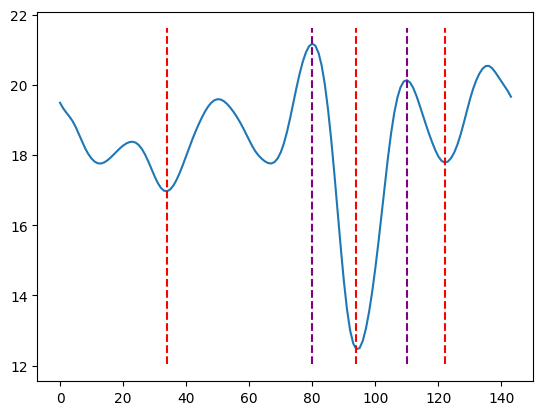

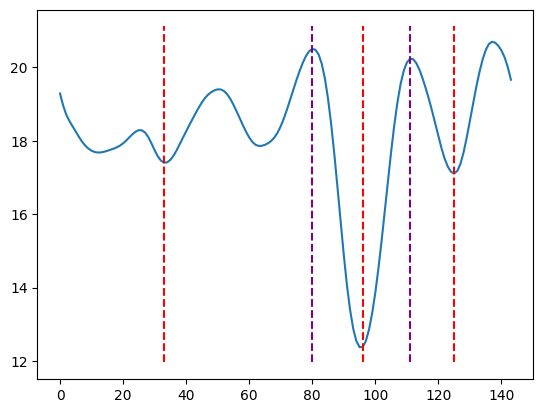

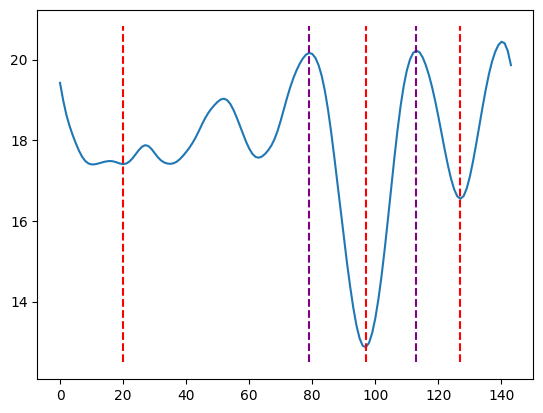

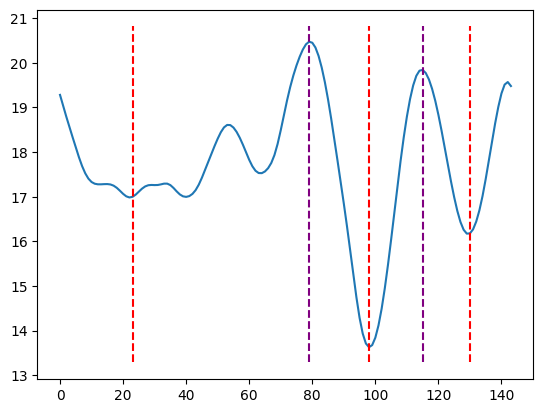

In [981]:
# day = 10
level = 6
for day in range(100):
    fig, ax = plt.subplots()
    ax.plot(d.grad_lines[day,level,:])
    yl = ax.get_ylim()
    ax.vlines(trough_locs[day], *yl, color='red', linestyle='dashed')
    ax.vlines(peak_locs[day], *yl, color='purple', linestyle='dashed')

In [908]:
d.update_max_lines((1.,2.,2.))

(0.0, 143.0, 0.0, 35.0)

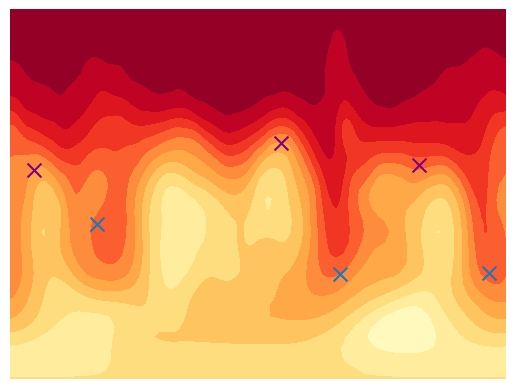

In [1022]:
day = 10
level = 5
fig, ax = plt.subplots()
ax.contourf(d.hgts[day,level,...], cmap='YlOrRd', levels=10)
ax.scatter(trough_locs[day], d.grad_lines[day, level][trough_locs[day]], marker='x',s=100)
ax.scatter(peak_locs[day], d.grad_lines[day, level][peak_locs[day]], marker='x', s=100,color='purple')
ax.axis('off')
# ax.vlines(trough_locs[day], *ax.get_ylim(), color='blue', linestyle='dashed')

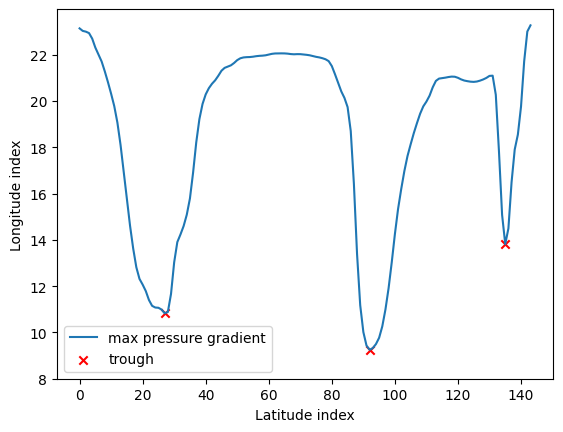

In [672]:
day = 6
level = 4
l = d.grad_lines[day,level,:]
peaks = signal.find_peaks(-l, distance=20, prominence=0.2)[0]
plt.plot(l, label='max pressure gradient')
plt.scatter(peaks, l[peaks], c='red', marker='x', label='trough')
plt.xlabel("Latitude index")
plt.ylabel("Longitude index")
plt.ylim((8, None))
plt.legend()